In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime

In [29]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [8]:
release_dates = pd.read_csv('data/release_dates.csv', 
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### How many movies are listed in the titles dataframe?

In [8]:
titles.count()

title    244914
year     244914
dtype: int64

### What is the name and year of the very first movie ever made?


In [13]:
titles.min()

title    #1 Serial Killer
year                 1894
dtype: object

### How many movies have the title "Hamlet"?

In [23]:
titles[titles['title'] == 'Hamlet'].count()

title    20
year     20
dtype: int64

### When was the first movie titled "Hamlet" made?

In [24]:
titles[titles['title'] == 'Hamlet'].min()

title    Hamlet
year       1910
dtype: object

### List all of the "Treasure Island" movies from earliest to most recent.

In [27]:
titles[titles['title'] == 'Treasure Island'].sort_values(by=['year']).head()

,title,year
217091,Treasure Island,1918
54095,Treasure Island,1920
201357,Treasure Island,1934
102046,Treasure Island,1950
81338,Treasure Island,1972


### How many movies were made in the year 1950?

In [29]:
titles[titles['year'] == 1950].count()

title    1113
year     1113
dtype: int64

### What are the names of the movies made through 1906?

In [33]:
titles[titles['year'] == 1906]['title'].head()

29753         The Joe Gans-Battling Nelson Fight
153052                             Lika mot lika
175231               The Story of the Kelly Gang
203902                Highlights from The Mikado
225531    Impersonation of Nelson-McGovern Fight
Name: title, dtype: object

### In what years has a movie titled "Batman" been released?

In [34]:
titles[titles['title'] == 'Batman']['year'].head()

59052    1989
78565    1943
Name: year, dtype: int64

### How many roles were there in the movie "Inception"?

In [105]:
len(cast[cast['title'] == 'Inception'])

78

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [103]:
len(cast[(cast['title'] == 'Inception') & (cast['n'].isnull())])

27

### But how many roles in the movie "Inception" did receive an "n" value?

In [104]:
len(cast[(cast['title'] == 'Inception') & (cast['n'].notnull())])

51

### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [53]:
cast[(cast['title'] == 'Sleuth') & (cast['year'] == 2007)].sort_values(by=['n']).head()

,title,year,name,type,character,n
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


### How many "Hamlet" roles have been listed in all film credits through history?

In [118]:
cast[cast['title'] == 'Hamlet']['character'].count()

342

### How many people have played an "Ophelia"?

In [106]:
len(cast[cast['title'] == 'Ophelia'])

20

### How many roles has Sidney Poitier played throughout his career?

In [112]:
len(cast[cast['name'] == 'Sidney Poitier'])

43

### What are the ten most common movie names of all time?


In [88]:
titles['title'].value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Othello                 11
The Three Musketeers    11
Freedom                 11
Honeymoon               11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [120]:
titles[(titles['year'] >= 1930) & (titles['year'] <= 1939)].title.value_counts().head(3)

Temptation               3
The Life of the Party    3
The Three Musketeers     3
Name: title, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

1890
2110


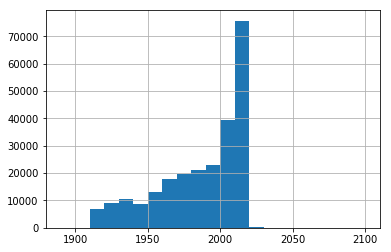

In [148]:
mi = titles.year.min()//10*10
ma = titles.year.max()//10*10
bins = np.arange(mi, ma, 10)
print(mi)
print(ma)
titles.year.hist(bins=bins)

### Which actors or actresses appeared in the most movies in the year 1945?

In [121]:
cast[(cast['year'] == 1945)].name.value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

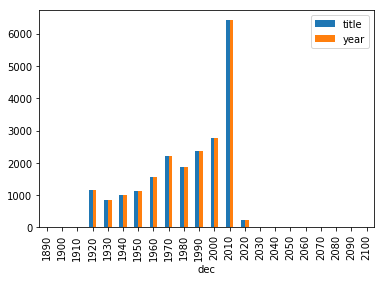

In [30]:
mi = titles.year.min()//10*10
ma = titles.year.max()//10*10
bins = range(mi, ma, 10)
titles['dec'] = pd.Categorical(titles.year, categories=bins)
titles.groupby('dec').count().plot(kind = 'bar')

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.


In [165]:
bins = np.arange(1, 13, 1)
print(bins)


release_dates.columns
release_dates.date[1].month

[ 1  2  3  4  5  6  7  8  9 10 11 12]


10

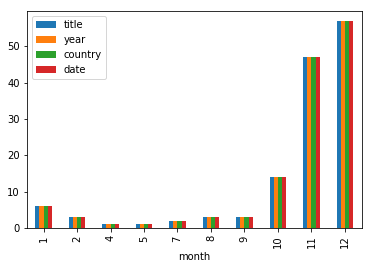

In [24]:
release_dates['month'] = release_dates.date.dt.month
release_dates[(release_dates.title.str.contains('Christmas'))&(release_dates.country == 'USA')].groupby('month').count().plot(kind='bar')